# Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Dataset

In [2]:
data = pd.read_csv('FastagFraudDetection.csv')

# show the top 5 columns
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


# Data Validation


In [3]:
print(data.isnull().sum())


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [4]:
# Find the mean of that column
data.FastagID.mode()

0       FTG-000-QAZ-210
1       FTG-001-ABC-111
2       FTG-001-ABC-121
3       FTG-001-ABC-123
4       FTG-001-ACC-123
             ...       
4446    FTG-997-PLN-110
4447    FTG-998-VFR-876
4448    FTG-999-DEF-234
4449    FTG-999-FGH-234
4450    FTG-999-WSX-543
Name: FastagID, Length: 4451, dtype: object

In [5]:
# Replace the null value with mod of that column
data.FastagID = data.FastagID.fillna("FTG-000-QAZ-210")

In [6]:
print(data.isnull().sum())


Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64


In [7]:
# Example: Select features for modeling
selected_features = ['Amount_paid', 'Vehicle_Speed', 'Transaction_ID']
data_model = data[selected_features]
data_model

,Amount_paid,Vehicle_Speed,Transaction_ID
0,120,65,1
1,100,78,2
2,0,53,3
3,120,92,4
4,100,60,5
...,...,...,...
4995,330,81,4996
4996,125,64,4997
4997,115,93,4998
4998,145,57,4999


# Univariate Analysis

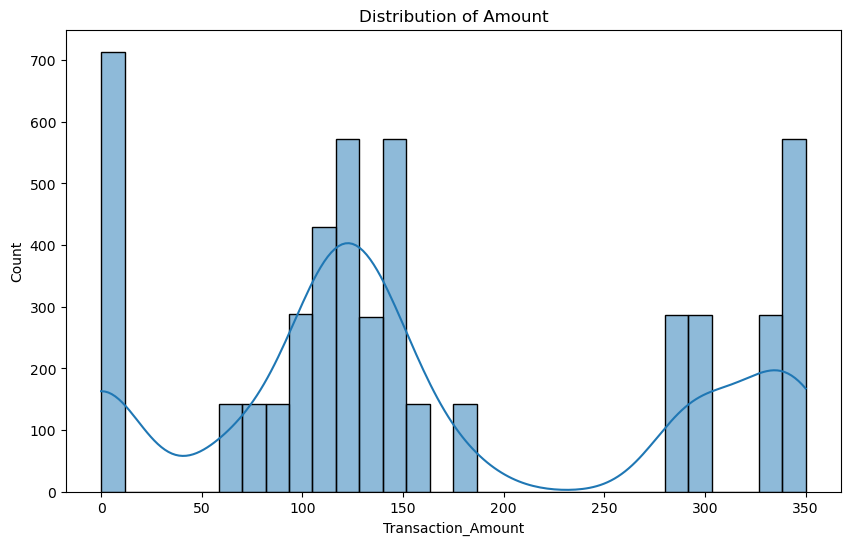

In [8]:
# Graph 1: Histogram of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.show()


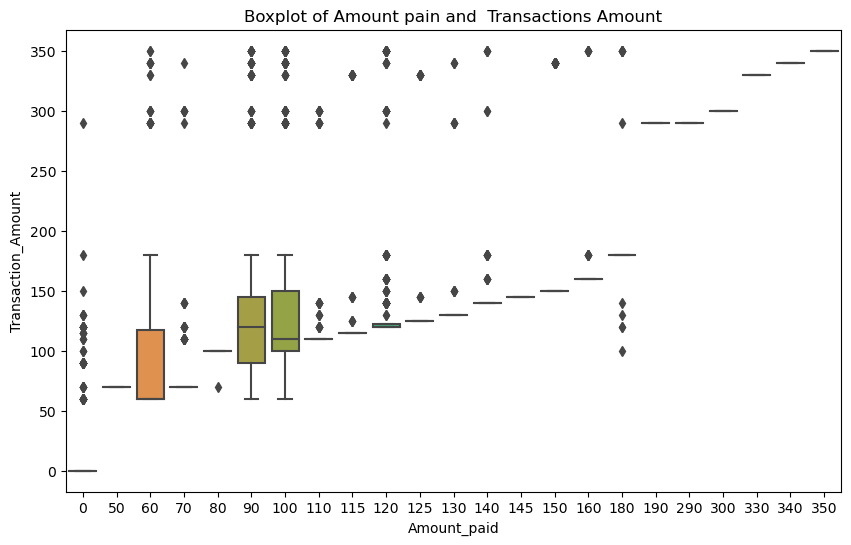

In [9]:
# Graph 3: Box plot for outliers detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount_paid', y='Transaction_Amount', data=data)
plt.title('Boxplot of Amount pain and  Transactions Amount')
plt.show()

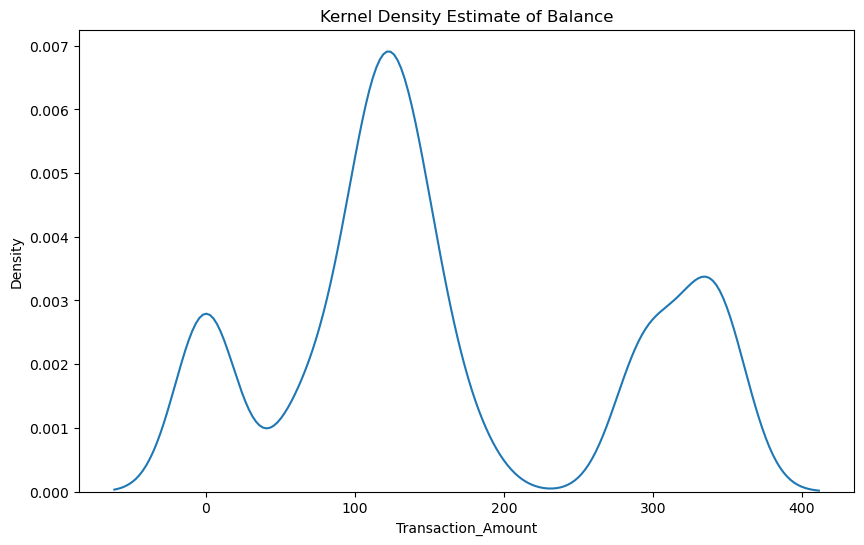

In [10]:
# Graph 4: Kernel Density Estimate (KDE) plot for a numerical variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Transaction_Amount'])
plt.title('Kernel Density Estimate of Balance')
plt.show()

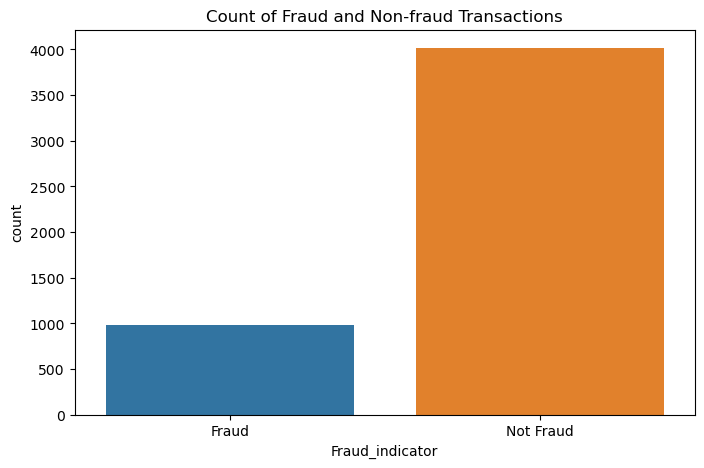

In [11]:
# Graph 5: Count plot of binary variable (fraud or not fraud)
plt.figure(figsize=(8, 5))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Count of Fraud and Non-fraud Transactions')
plt.show()

## Bivariate Analysis

D:\Jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


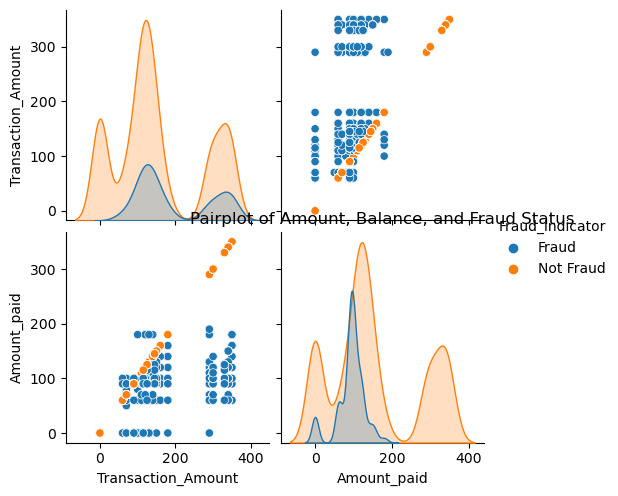

In [12]:
# Graph 1: Pairplot for multiple numerical variables
sns.pairplot(data[['Transaction_Amount', 'Amount_paid', 'Fraud_indicator']], hue='Fraud_indicator')
plt.title('Pairplot of Amount, Balance, and Fraud Status')
plt.show()

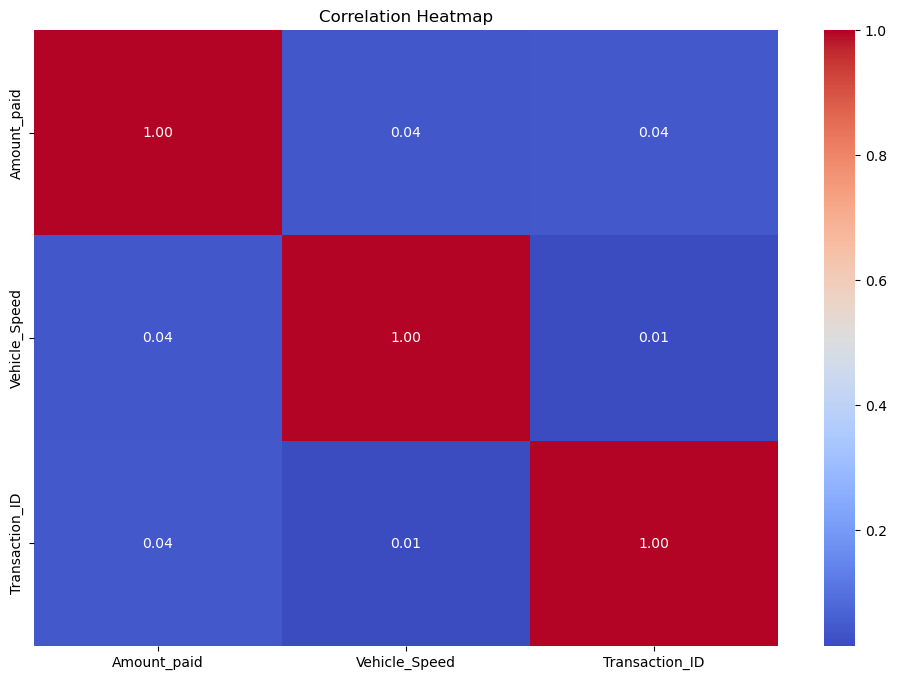

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

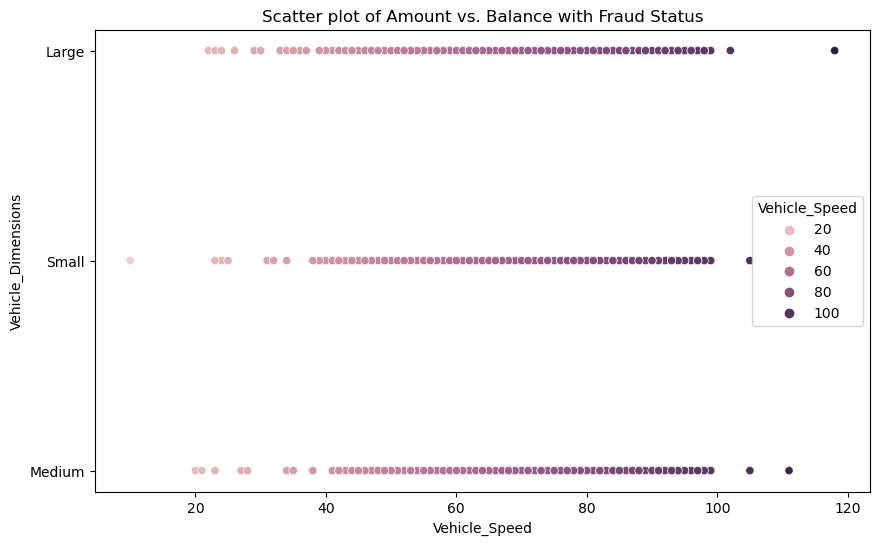

In [14]:
# Graph 3: Scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle_Speed', y='Vehicle_Dimensions', hue='Vehicle_Speed', data=data)
plt.title('Scatter plot of Amount vs. Balance with Fraud Status')
plt.show()


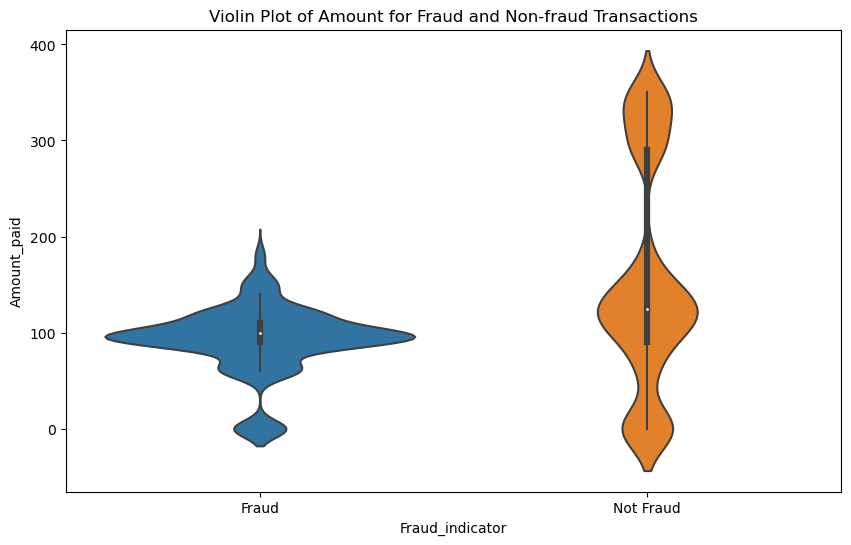

In [15]:
# Graph 4: Violin plot for a numerical and a categorical variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fraud_indicator', y='Amount_paid', data=data)
plt.title('Violin Plot of Amount for Fraud and Non-fraud Transactions')
plt.show()

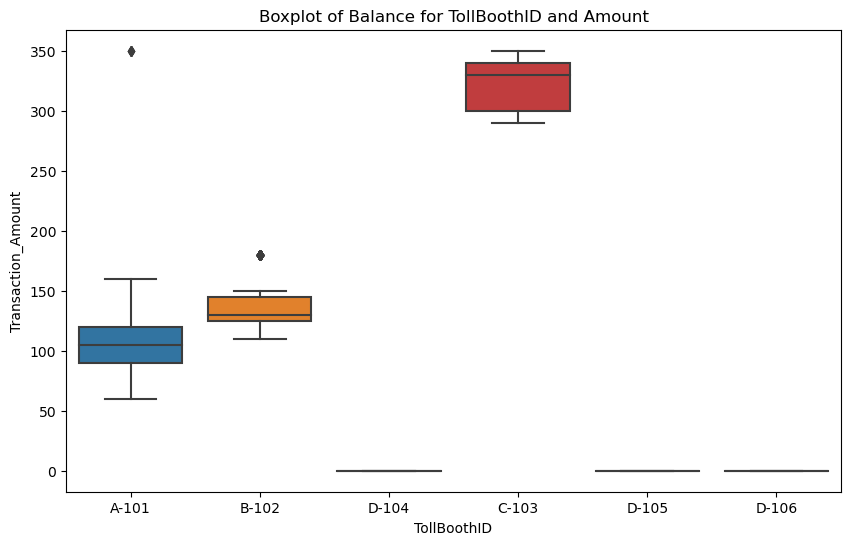

In [17]:
# Graph 5: Box plot for a numerical variable and a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='TollBoothID', y='Transaction_Amount', data=data)
plt.title('Boxplot of Balance for TollBoothID and Amount')
plt.show()